In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
x= np.array([[1], [2], [3], [4], [5]])
y= np.array([2, 4, 6, 8, 10])
model = LinearRegression()
model.fit(x, y)
test_data = np.array([[6]])
prediction = model.predict(test_data)
print("Prediction for input {} : {}".format(test_data.flatten(),prediction[0]))

Prediction for input [6] : 12.0


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 7, 8])
model = LinearRegression()
model.fit(X, y)
X_test = np.array([[6], [7], [8]])
y_pred = model.predict(X_test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Predictions:", y_pred)

Coefficients: [1.5]
Intercept: 0.7000000000000002
Predictions: [ 9.7 11.2 12.7]


In [3]:
from sklearn.linear_model import LogisticRegression
import numpy as np
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([0, 0, 0, 1, 1])
model = LogisticRegression()
model.fit(x, y)
test_data = np.array([[2.5], [3.5]])
predictions = model.predict(test_data)
print("Predictions for inputs {}: {}".format(test_data.flatten(),
predictions))


Predictions for inputs [2.5 3.5]: [0 0]


In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3]])
y = np.array([0, 0, 0, 1, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2,
random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [6]:
from sklearn.cluster import KMeans
import numpy as np
data = np.array([[1, 2], [1, 4], [10, 2], [10, 4]])
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(data)
print("Labels:", kmeans.labels_)

Labels: [0 0 1 1]


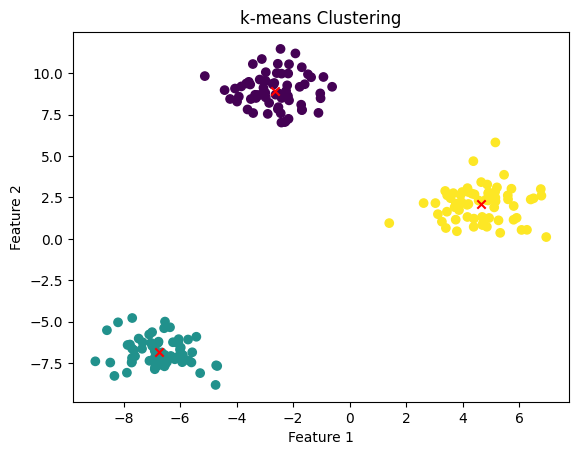

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=200, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42) # Set n_init
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red')
plt.title("k-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [9]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0], [1, 1], [0, 1], [1, 0],
[0, 0], [1, 1], [0, 0]])
y = np.array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0])
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.4, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Dataset Sample:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  

KNN Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



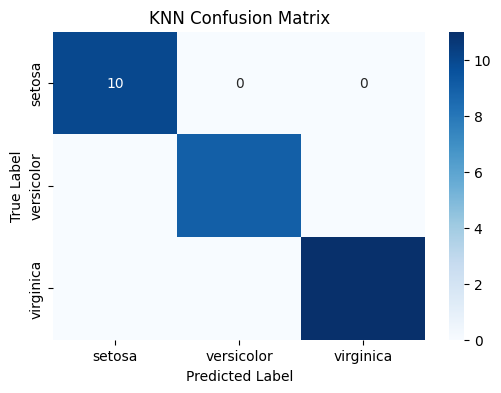


Predicted Class for Sample: setosa


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Convert to Pandas DataFrame for easy visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Display dataset sample
print("Dataset Sample:\n", df.head())

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature values for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN classifier with k=5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix")
plt.show()

# Predict a new sample (Example: Sepal length = 5.5, Sepal width = 3.0, Petal length = 1.3, Petal width = 0.2)
sample = np.array([[5.5, 3.0, 1.3, 0.2]])
sample_scaled = scaler.transform(sample)
prediction = knn.predict(sample_scaled)

print("\nPredicted Class for Sample:", iris.target_names[prediction[0]])

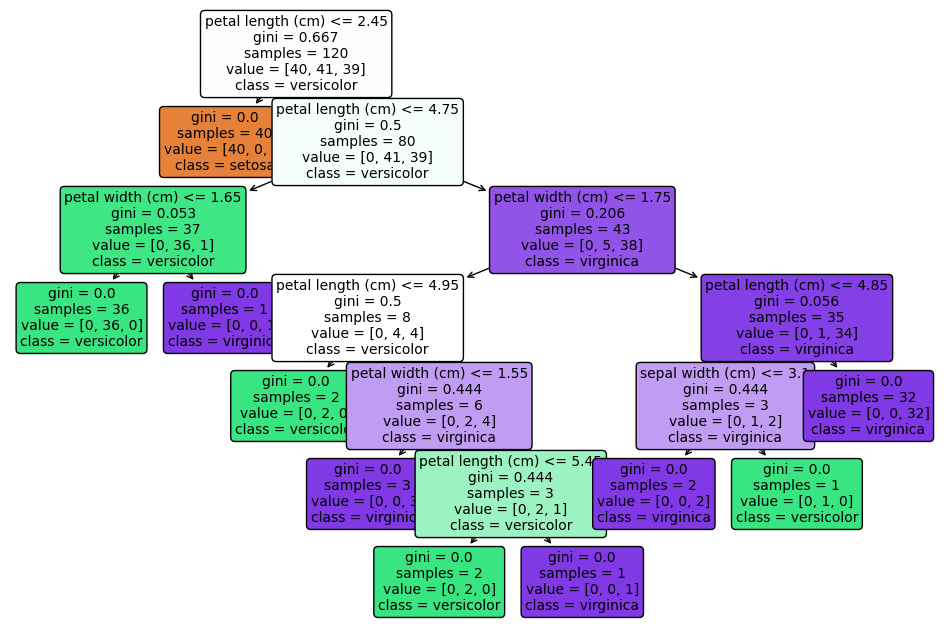

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load sample dataset (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualizing the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True, fontsize=10)
plt.show()